In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

default_data = pd.read_csv('/Users/jason/Documents/solar_weather.csv')

default_data.head()

,Time,GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,Energy delta[Wh]
0,1/1/17 0:00,0.0,1.6,1021,100,4.9,0.0,0.0,100,0.0,0,450,0.0,4,0,1,0
1,1/1/17 0:15,0.0,1.6,1021,100,4.9,0.0,0.0,100,0.0,0,450,0.0,4,0,1,0
2,1/1/17 0:30,0.0,1.6,1021,100,4.9,0.0,0.0,100,0.0,0,450,0.0,4,0,1,0
3,1/1/17 0:45,0.0,1.6,1021,100,4.9,0.0,0.0,100,0.0,0,450,0.0,4,0,1,0
4,1/1/17 1:00,0.0,1.7,1020,100,5.2,0.0,0.0,100,0.0,0,450,0.0,4,1,1,0


In [53]:
default_data.shape

(196776, 17)

In [54]:
# Data Preprocessing Steps

# 1. Check missing values

missing_values = default_data.isnull().sum()
missing_values

Time                       0
GHI                        0
temp                       0
pressure                   0
humidity                   0
wind_speed                 0
rain_1h                   95
snow_1h                   95
clouds_all                 0
isSun                     95
sunlightTime               0
dayLength                  0
SunlightTime/daylength     0
weather_type               0
hour                       0
month                      0
Energy delta[Wh]           0
dtype: int64

In [55]:
# 2. Convert categorical data to numerical using one-hot encoding
data_encoded = pd.get_dummies(default_data, columns=['Entity'])

KeyError: "None of [Index(['Entity'], dtype='object')] are in the [columns]"

In [56]:
from sklearn.impute import SimpleImputer
# Fill the missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(default_data.drop(['Time'],axis=1))
data_imputed = pd.DataFrame(data_imputed, columns=default_data.columns.drop(['Time']))
# Check again
missing_values_after_imputation = data_imputed.isnull().sum().sum()

data = data_imputed.join(default_data['Time'])
imputation_result = {
    "Missing Values After Imputation": missing_values_after_imputation,
    "Data Shape After Imputation": data_imputed.shape
}
imputation_result


{'Missing Values After Imputation': 0,
 'Data Shape After Imputation': (196776, 16)}

In [57]:
data.head()

,GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,Energy delta[Wh],Time
0,0.0,1.6,1021.0,100.0,4.9,0.0,0.0,100.0,0.0,0.0,450.0,0.0,4.0,0.0,1.0,0.0,1/1/17 0:00
1,0.0,1.6,1021.0,100.0,4.9,0.0,0.0,100.0,0.0,0.0,450.0,0.0,4.0,0.0,1.0,0.0,1/1/17 0:15
2,0.0,1.6,1021.0,100.0,4.9,0.0,0.0,100.0,0.0,0.0,450.0,0.0,4.0,0.0,1.0,0.0,1/1/17 0:30
3,0.0,1.6,1021.0,100.0,4.9,0.0,0.0,100.0,0.0,0.0,450.0,0.0,4.0,0.0,1.0,0.0,1/1/17 0:45
4,0.0,1.7,1020.0,100.0,5.2,0.0,0.0,100.0,0.0,0.0,450.0,0.0,4.0,1.0,1.0,0.0,1/1/17 1:00


In [58]:
data.shape

(196776, 17)

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
data['Time'] = pd.to_datetime(data['Time'])  # Convert to datetime
data.set_index('Time', inplace=True)   

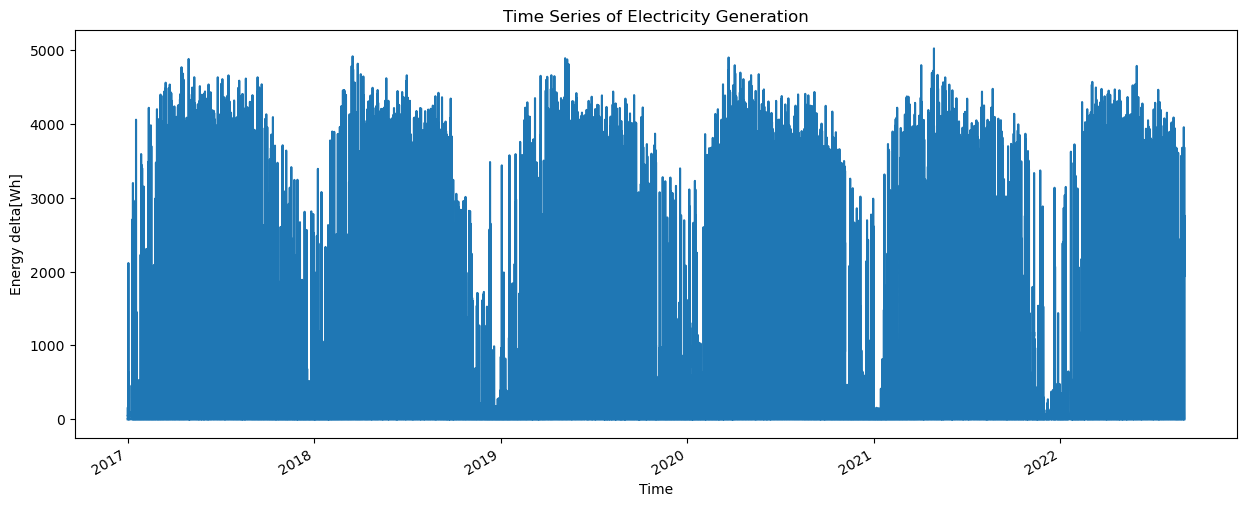

In [60]:
# Adding 2 time features
data['day_of_week'] = data.index.dayofweek
data['day_of_year'] = data.index.dayofyear
# The 'month' feature is already present in the dataset

# Time series plot of electricity generation
plt.figure(figsize=(15, 6))
data['Energy delta[Wh]'].plot()
plt.title('Time Series of Electricity Generation')
plt.ylabel('Energy delta[Wh]')
plt.xlabel('Time')
plt.show()


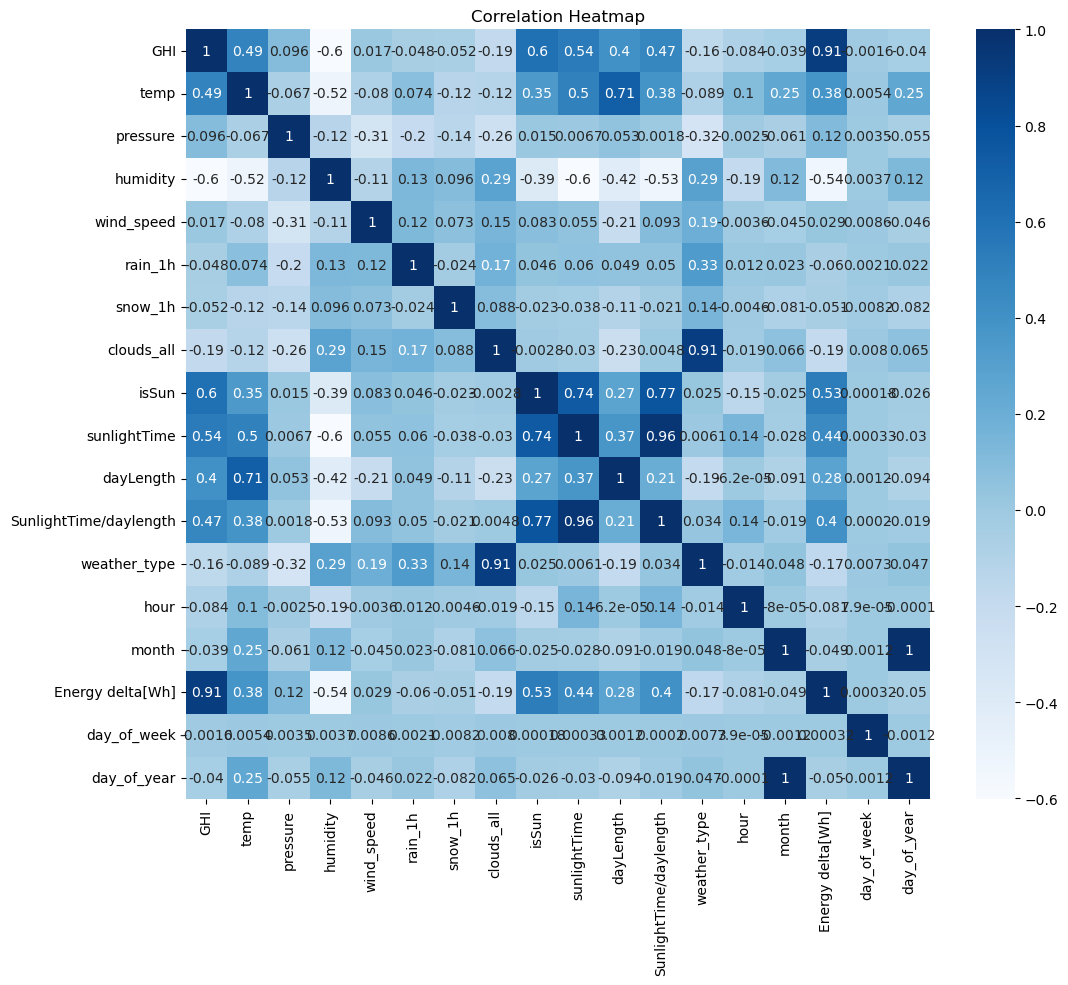

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
# Correlation analysis
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True,cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [62]:
#Model training and validation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
# Splitting the data
X = data.drop(['Energy delta[Wh]'], axis=1)
y = data['Energy delta[Wh]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [64]:
from sklearn.linear_model import LinearRegression

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

y_pred_linear = linear_model.predict(X_test_scaled)
# Calculating RMSE and R-squared
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

print('Linear Regression - ','rmse:',rmse_linear, 'r2:',r2_linear)


Linear Regression -  rmse: 396.69211918908627 r2: 0.8571939623269761


In [65]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

# Setting up hyperparameter grid for Lasso and Ridge
param_grid = {'alpha': np.logspace(-4, 4, 20)}

# Lasso Regression
lasso = Lasso(max_iter=10000)
grid_search_lasso = GridSearchCV(lasso, param_grid, cv=5)
grid_search_lasso.fit(X_train_scaled, y_train)

# Ridge Regression
ridge = Ridge()
grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5)
grid_search_ridge.fit(X_train_scaled, y_train)

# Getting the best parameters and scores
best_params_lasso = grid_search_lasso.best_params_
best_score_lasso = grid_search_lasso.best_score_
best_params_ridge = grid_search_ridge.best_params_
best_score_ridge = grid_search_ridge.best_score_

(best_params_lasso, best_score_lasso, best_params_ridge, best_score_ridge)


({'alpha': 0.03359818286283781},
 0.8537053429888047,
 {'alpha': 4.281332398719396},
 0.8537053077564268)

In [66]:
# Lasso Regression
lasso_best = Lasso(alpha=best_params_lasso['alpha'], max_iter=10000)
lasso_best.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_best.predict(X_test_scaled)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)
# Ridge Regression
ridge_best = Ridge(alpha=best_params_ridge['alpha'])
ridge_best.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_best.predict(X_test_scaled)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print('Lasso Regression - ','rmse:',rmse_lasso, 'r2:',r2_lasso)
print('Ridge Regression - ','rmse:',rmse_ridge, 'r2:',r2_ridge)


Lasso Regression -  rmse: 396.69096740052055 r2: 0.8571947915953914
Ridge Regression -  rmse: 396.6925064041978 r2: 0.8571936835380609


In [67]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

# KNN Model Training and Validation
k_values = range(1, 5)  # Trying values of k from 1 to 10
cross_val_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    cross_val_scores.append(np.mean(np.sqrt(-scores)))

# Finding the optimal 'k'
optimal_k = k_values[np.argmin(cross_val_scores)]
min_rmse = min(cross_val_scores)

# Train the model with the optimal 'k'
knn_best = KNeighborsRegressor(n_neighbors=optimal_k)
knn_best.fit(X_train_scaled, y_train)

y_pred_knn = knn_best.predict(X_test_scaled)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))

(optimal_k, min_rmse, rmse_knn)


(4, 297.393241252196, 283.1296542136334)

In [68]:
r2_knn = r2_score(y_test, y_pred_knn)

In [69]:
print('KNN - ','rmse:',rmse_knn, 'r2:',r2_knn)

KNN -  rmse: 283.1296542136334 r2: 0.9272538287003542


In [70]:
#Comparison
print('Linear Regression - ','rmse:',rmse_linear, 'r2:',r2_linear)
print('Lasso Regression - ','rmse:',rmse_lasso, 'r2:',r2_lasso)
print('Ridge Regression - ','rmse:',rmse_ridge, 'r2:',r2_ridge)
print('KNN - ','rmse:',rmse_knn, 'r2:',r2_knn)

Linear Regression -  rmse: 396.69211918908627 r2: 0.8571939623269761
Lasso Regression -  rmse: 396.69096740052055 r2: 0.8571947915953914
Ridge Regression -  rmse: 396.6925064041978 r2: 0.8571936835380609
KNN -  rmse: 283.1296542136334 r2: 0.9272538287003542


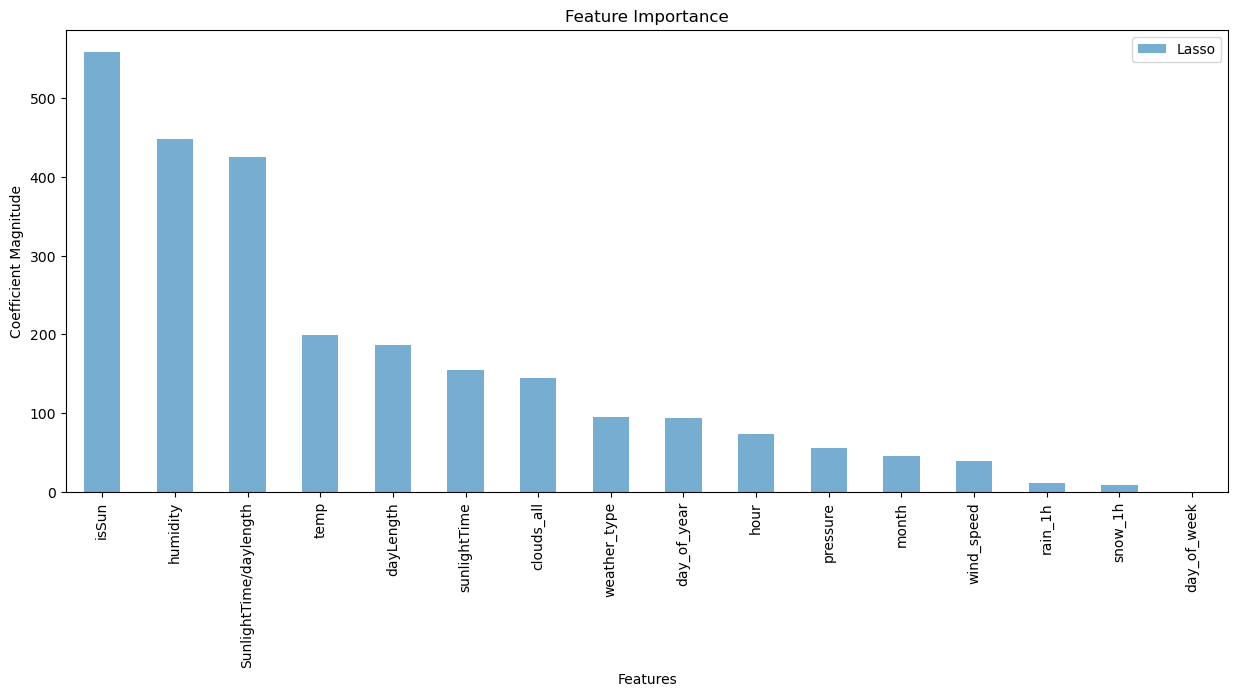

isSun                     559.054384
humidity                  448.736425
SunlightTime/daylength    425.009616
temp                      199.471261
dayLength                 186.804621
sunlightTime              154.860310
clouds_all                145.170178
weather_type               94.973275
day_of_year                93.601995
hour                       73.933492
pressure                   55.941464
month                      45.392888
wind_speed                 38.882998
rain_1h                    11.099432
snow_1h                     9.015977
day_of_week                 0.324565
dtype: float64

In [24]:
# Extracting feature names
feature_names = X.columns

# Feature Importance
coefficients_lasso = pd.Series(abs(lasso_best.coef_), index=feature_names).sort_values(key=abs, ascending=False)

# Feature Importance for Ridge Regression
#coefficients_ridge = pd.Series(ridge_best.coef_, index=feature_names).sort_values(key=abs, ascending=False)

# Plotting feature importance for both models
plt.figure(figsize=(15, 6))
coefficients_lasso.plot(kind='bar', color='#1f77b4', alpha=0.6, label='Lasso')
#coefficients_ridge.plot(kind='bar', color='grey', alpha=0.6, label='Ridge', width=0.6)
plt.title('Feature Importance')
plt.ylabel('Coefficient Magnitude')
plt.xlabel('Features')
plt.legend()
plt.show()

(coefficients_lasso)


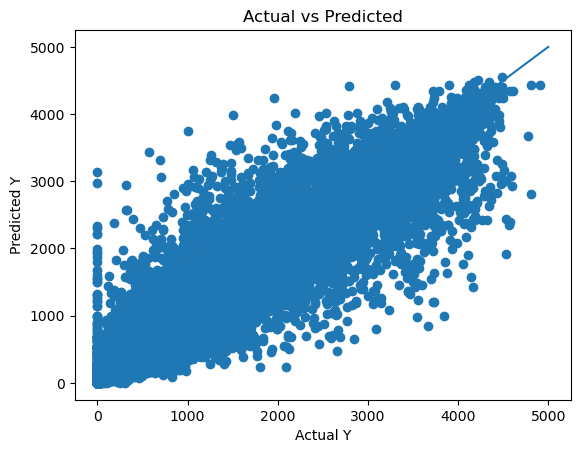

In [72]:
plt.scatter(y_test, y_pred_knn)
plt.plot(range(5000), range(5000))

plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.title("Actual vs Predicted")

plt.show()

In [81]:
#Application
y_pred_series = pd.Series(y_pred_knn,index=y_test.index, name='Predicted_KNN')
y_pred_lassos = pd.Series(y_pred_lasso,index=y_test.index, name='Predicted_Lasso')
# Combine X_test, y_test, and y_pred
combined_df = pd.concat([X_test, y_test.rename('Actual'), y_pred_series,y_pred_lassos], axis=1)


In [82]:
output_file_path = '/Users/jason/Desktop/combined_data_GHI.csv'
combined_df.to_csv(output_file_path)